<a href="https://colab.research.google.com/github/katetarasenko/Practical_8_10_FIT_4-10_Tarasenko/blob/main/Practical_8_10_FIT_4_10_Tarasenko.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install tensorflow keras

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Model
from keras.layers import Input, Dense, Flatten, Reshape
from keras import backend as K

In [ ]:
(x_train, _), (x_test, _) = mnist.load_data()

# Нормалізація даних (перетворюємо значення
# пікселів в діапазон [0, 1])
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Розгортання 28x28 зображень у вектор 784
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
from keras.models import Model
from keras.layers import Input, Dense
from keras.optimizers import Adam

In [ ]:
# Розмір вхідного шару (784 пікселі)
input_dim = x_train.shape[1]

# Розмір стисненого представлення (кількість нейронів у прихованому шарі)
encoding_dim = 32

# Вхідний шар
input_img = Input(shape=(input_dim,))
# Кодуючий шар
encoded = Dense(encoding_dim, activation='relu')(input_img)
# Декодуючий шар
decoded = Dense(input_dim, activation='sigmoid')(encoded)
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer=Adam(), loss='binary_crossentropy')

history = autoencoder.fit(x_train, x_train,
                          epochs=50,
                          batch_size=256,
                          shuffle=True,
                          validation_data=(x_test, x_test))

Epoch 1/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - loss: 0.3831 - val_loss: 0.1919
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.1814 - val_loss: 0.1535
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.1495 - val_loss: 0.1337
Epoch 4/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.1319 - val_loss: 0.1218
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.1208 - val_loss: 0.1135
Epoch 6/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.1130 - val_loss: 0.1075
Epoch 7/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.1074 - val_loss: 0.1028
Epoch 8/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.1030 - val_loss: 0.0994
Epoch 9/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.1000 - val_loss: 0.0970
Epoch 10/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0978 - val_loss: 0.0955
Epoch 11/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0965 - val_loss: 0.0945
Epoch 12/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms

графік функції втрат для автокодувальника без шуму

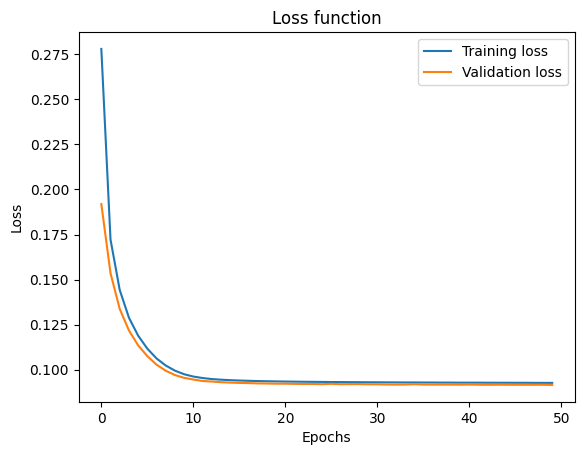

In [ ]:
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Loss function')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


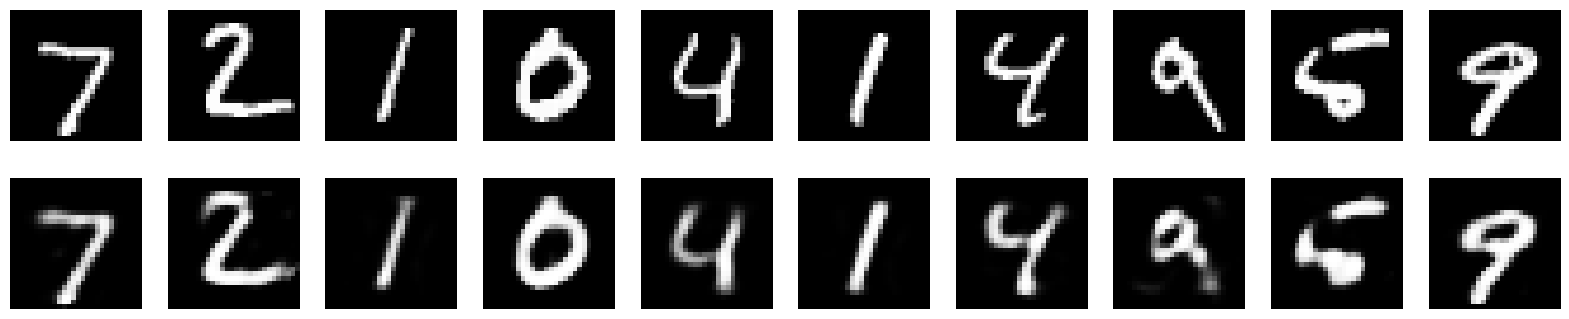

In [ ]:
decoded_imgs = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # Відображення оригіналу
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.axis('off')

    # Відображення відновленого зображення
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='gray')
    plt.axis('off')
plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


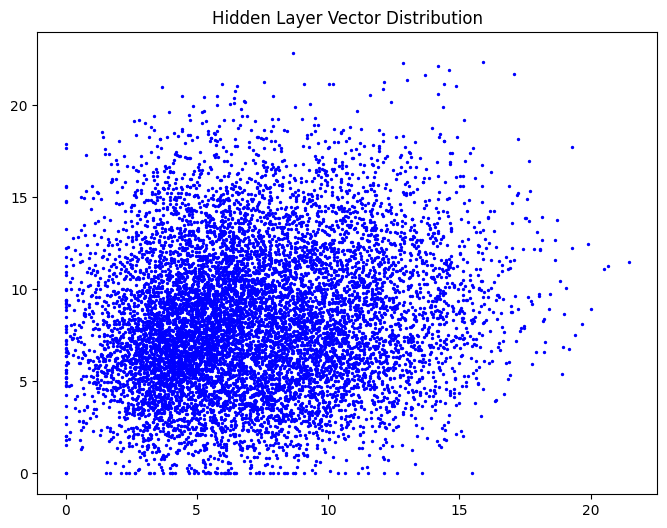

In [ ]:
encoder = Model(input_img, encoded)

# Отримуємо приховані вектори
encoded_imgs = encoder.predict(x_test)

# Відображення розподілу векторів прихованого шару (для перших 1000 точок)
plt.figure(figsize=(8, 6))
plt.scatter(encoded_imgs[:, 0], encoded_imgs[:, 1], c='blue', s=2)
plt.title('Hidden Layer Vector Distribution')
plt.show()

In [ ]:
from keras.layers import GaussianNoise

# Додаємо шар шуму до вхідних даних
input_img_noisy = Input(shape=(input_dim,))
noisy = GaussianNoise(0.1)(input_img_noisy)

# Кодуючий шар
encoded_noisy = Dense(encoding_dim, activation='relu')(noisy)

# Декодуючий шар
decoded_noisy = Dense(input_dim, activation='sigmoid')(encoded_noisy)

# Створюємо модель автокодувальника із шумом
autoencoder_noisy = Model(input_img_noisy, decoded_noisy)

# Компіляція моделі
autoencoder_noisy.compile(optimizer=Adam(), loss='binary_crossentropy')

# Навчання моделі
history_noisy = autoencoder_noisy.fit(x_train, x_train,
                                      epochs=50,
                                      batch_size=256,
                                      shuffle=True,
                                      validation_data=(x_test, x_test))

Epoch 1/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 0.3874 - val_loss: 0.1877
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - loss: 0.1779 - val_loss: 0.1524
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - loss: 0.1497 - val_loss: 0.1342
Epoch 4/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.1332 - val_loss: 0.1214
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - loss: 0.1221 - val_loss: 0.1132
Epoch 6/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.1145 - val_loss: 0.1076
Epoch 7/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - loss: 0.1095 - val_loss: 0.1034
Epoch 8/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - loss: 0.1054 - val_loss: 0.1002
Epoch 9/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.1029 - val_loss: 0.0979
Epoch 10/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.1004 - val_loss: 0.0963
Epoch 11/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.0991 - val_loss: 0.0951
Epoch 12/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 

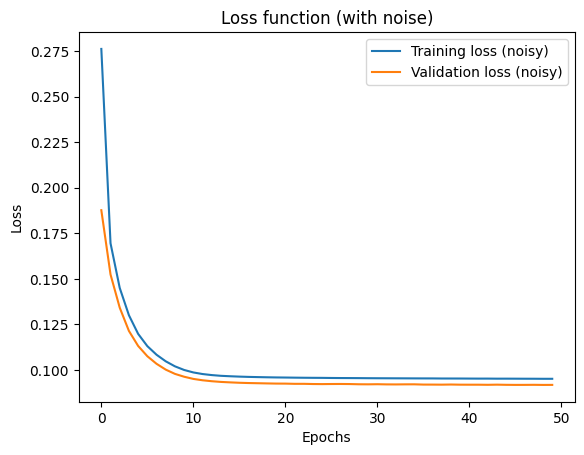

In [ ]:
plt.plot(history_noisy.history['loss'], label='Training loss (noisy)')
plt.plot(history_noisy.history['val_loss'], label='Validation loss (noisy)')
plt.title('Loss function (with noise)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


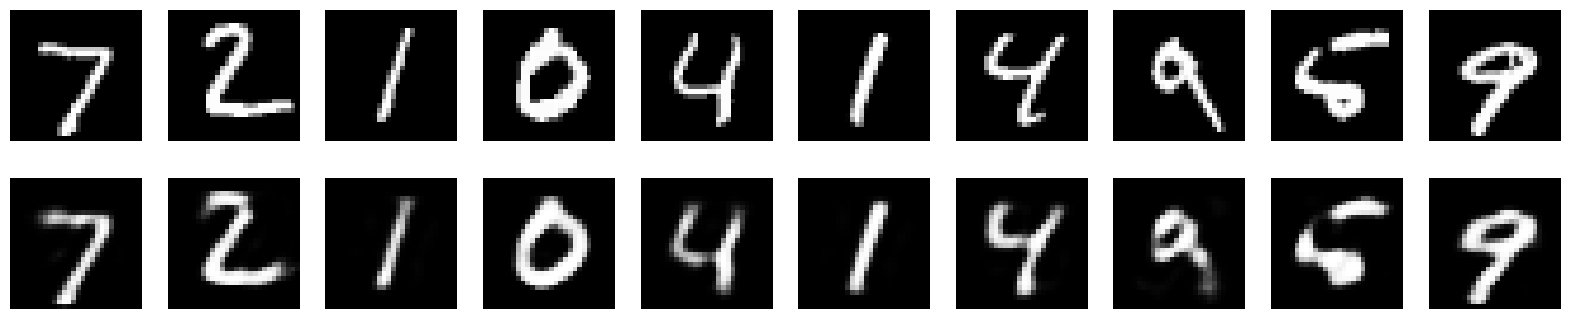

In [ ]:
decoded_imgs_noisy = autoencoder_noisy.predict(x_test)


n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # Відображення оригіналу
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.axis('off')

    # Відображення відновленого зображення з шумом
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs_noisy[i].reshape(28, 28), cmap='gray')
    plt.axis('off')
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


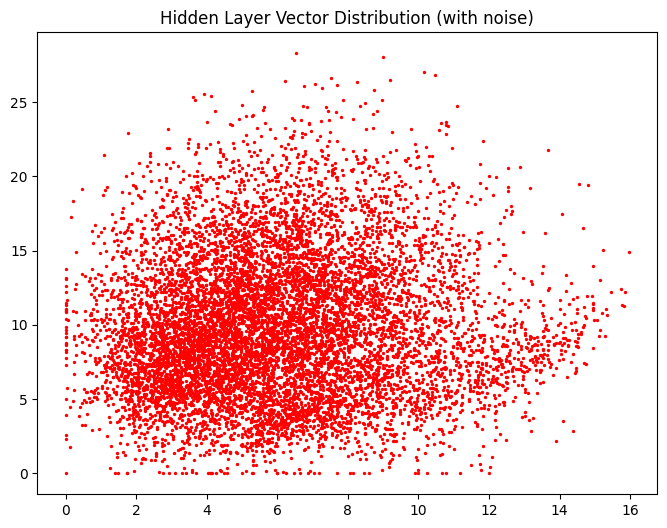

In [ ]:
encoder_noisy = Model(input_img_noisy, encoded_noisy)


encoded_imgs_noisy = encoder_noisy.predict(x_test)

plt.figure(figsize=(8, 6))
plt.scatter(encoded_imgs_noisy[:, 0], encoded_imgs_noisy[:, 1], c='red', s=2)
plt.title('Hidden Layer Vector Distribution (with noise)')
plt.show()